In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files

In [2]:
# Загрузка файла
uploaded = files.upload()

# Получение имени файла
uploaded_file_name = next(iter(uploaded))

# Создание DataFrame из загруженных данных
df = pd.read_csv(io.StringIO(uploaded[uploaded_file_name].decode('utf-8')))

# Вывод первых нескольких строк датасета для проверки
df.head()

Saving dataset_1.csv to dataset_1.csv


,feature_1,feature_2,target
0,-0.532193,0.814028,0
1,-0.212750,1.011712,0
2,0.306720,0.959148,0
3,0.786851,-0.031955,1
4,-0.239004,-0.757634,1


In [3]:
df.columns

Index(['feature_1', 'feature_2', 'target'], dtype='object')

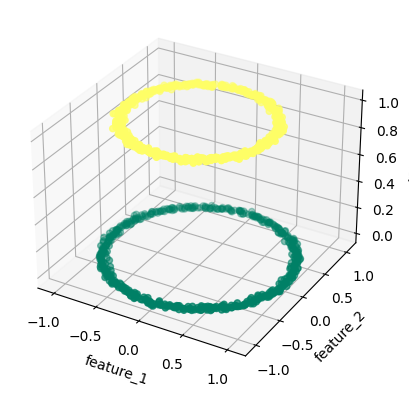

In [4]:
X = df['feature_1']
Y = df['feature_2']
Z = df['target']

colors = plt.cm.summer((Z - Z.min()) / (Z.max() - Z.min()))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, marker='o', c=colors)

# Настройки осей
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('target')
# ax.grid(False)

plt.show()

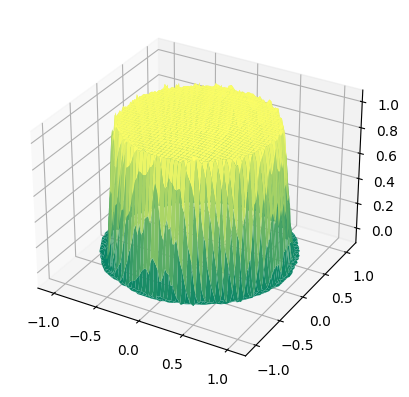

In [6]:
from scipy.interpolate import griddata
import numpy as np

num_points = 100
x_range = np.linspace(df['feature_1'].min(), df['feature_1'].max(), num_points)
y_range = np.linspace(df['feature_2'].min(), df['feature_2'].max(), num_points)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Интерполируйте Z на основе полученной сетки (x_grid, y_grid)
xy_tuples = np.vstack((df['feature_1'], df['feature_2'])).T
z_grid = griddata(xy_tuples, df['target'], (x_grid, y_grid), method='cubic')

# Построение графика с использованием plot_surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='summer', edgecolors='none')
plt.show()

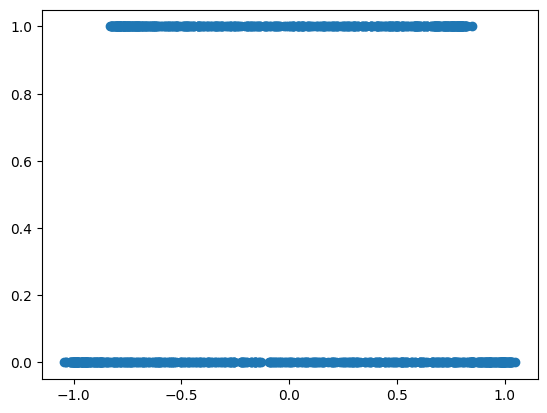

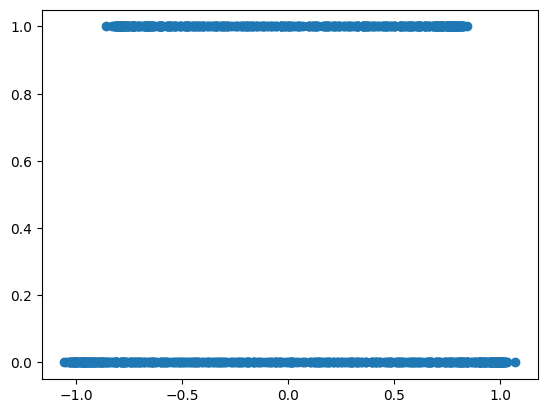

In [8]:
plt.scatter(df['feature_1'], df['target'])
plt.show()

plt.scatter(df['feature_2'], df['target'])
plt.show()

In [9]:
corr = df.corr()

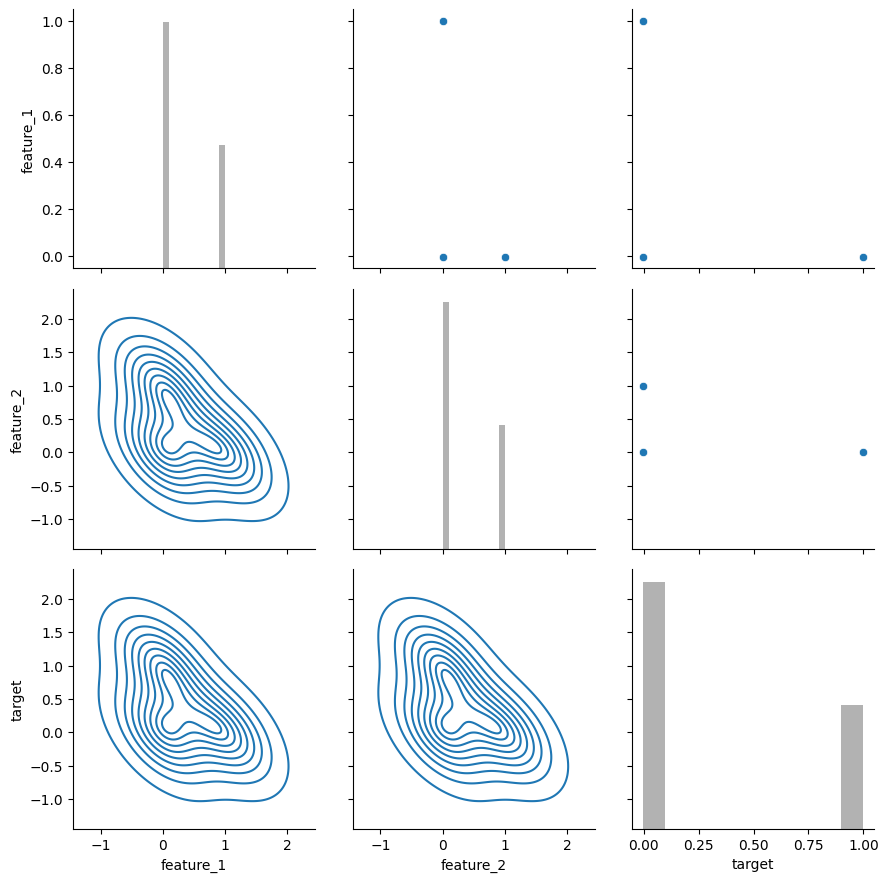

In [10]:
pairplt = sns.PairGrid(corr, height=3)
pairplt.map_upper(sns.scatterplot)
pairplt.map_diag(plt.hist, alpha=0.3, color='black')
pairplt.map_lower(sns.kdeplot);

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

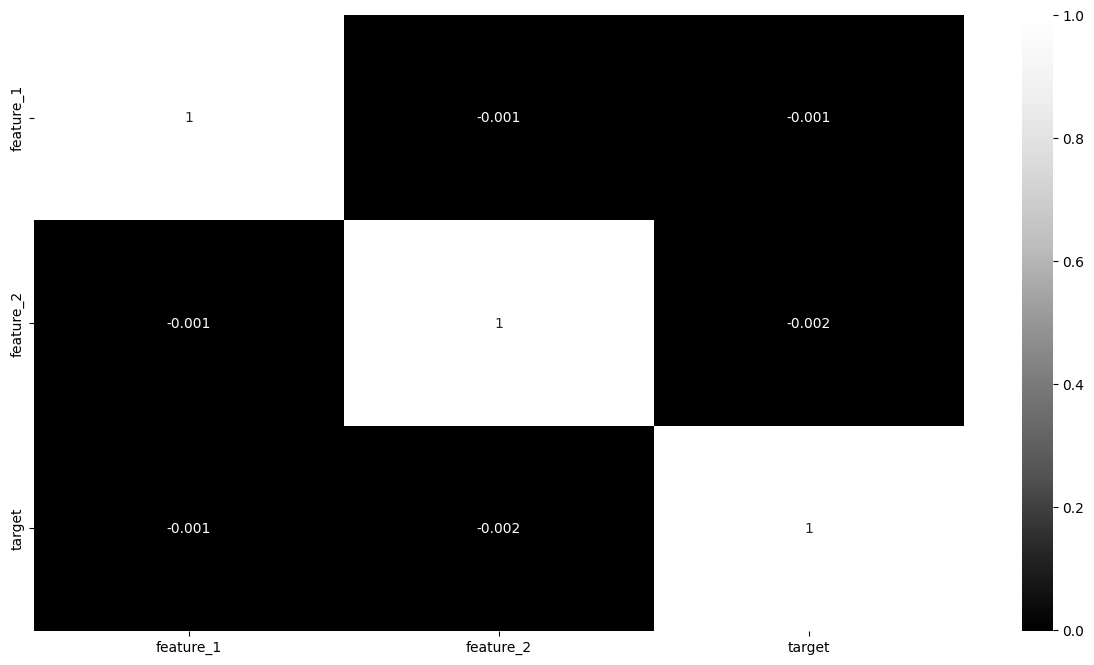

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='Greys_r')
plt.show()

Зависимости нет